In [ ]:
import gizmo_analysis as gizmo  # rename these packages for brevity
import matplotlib.pyplot as plt
import numpy as np
import utilities as ut

In [3]:
sim = "m12i"
sim_dir = "/Users/z5114326/Documents/simulations/"
fire_dir = sim_dir + sim + "/" + sim + "_res7100"

In [11]:
snap = 600

part = gizmo.io.Read.read_snapshots(
    "all", "index", snap, simulation_directory=fire_dir, assign_hosts_rotation=True
)


# in utilities.simulation.Snapshot():
* reading:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.Partic

In [5]:
def plot_image(
    part,
    species_name="star",
    weight_name="mass",
    part_indices=None,
    dimensions_plot=[0, 1],
    distance_max=20,
    distance_bin_width=0.1,
    rotation=True,
    host_index=0,
    image_limits=[None, None],
):
    """
    Plot 2-D projected image of the positions of given partcle species.

    Parameters
    ----------
    part : dict
        catalog of particles at snapshot
    species_name : str
        name of particle species to plot
    weight_name : str
        property to weight positions by
    part_indices : array
        input selection indices for particles
    dimensions_plot : list
        spatial dimensions to plot
    distance_max : float or array
        maximum distance from center to plot [kpc]
    distance_bin_width : float
        size of pixel [kpc]
    rotation : bool or array
        whether to rotate particles
        if True, will rotate to align with principal axes defined by input species
    host_index : int
        index of host halo to get position and rotation of (if not input them)
    image_limits : list
        min and max limits to impose on image dynamic range (exposure)
    """
    from matplotlib import colors

    dimen_label = {0: "x", 1: "y", 2: "z"}

    # get distance limits for plot
    position_limits = [[-distance_max, distance_max] for _ in range(2)]
    position_limits = np.array(position_limits)

    # get array of particle indices (if not input)
    if part_indices is None or len(part_indices) == 0:
        part_indices = ut.array.get_arange(part[species_name]["position"].shape[0])

    # get positions relative to host galaxy center
    host_name = ut.catalog.get_host_name(host_index)
    if rotation is True:
        # rotate according to principal axes
        positions = part[species_name].prop(f"{host_name}.distance.principal", part_indices)
    else:
        # positions in (arbitrary) Cartesian x,y,z of simulation
        positions = part[species_name].prop(f"{host_name}.distance", part_indices)

    # weight particles by some property?
    weights = None
    if weight_name:
        weights = part[species_name].prop(weight_name, part_indices)

    # keep only particles within distance limits along each dimension
    masks = positions[:, dimensions_plot[0]] <= distance_max
    for dimen_i in dimensions_plot:
        masks *= (positions[:, dimen_i] >= -distance_max) * (positions[:, dimen_i] <= distance_max)

    # keep only positions and weights within distance limits
    positions = positions[masks]
    if weights is not None:
        weights = weights[masks]

    # get number of bins (pixels) along each dimension
    position_bin_number = int(np.round(2 * np.max(distance_max) / distance_bin_width))

    # get 2-D histogram
    hist_valuess, hist_xs, hist_ys = np.histogram2d(
        positions[:, dimensions_plot[0]],
        positions[:, dimensions_plot[1]],
        position_bin_number,
        position_limits,
        weights=weights,
    )
    # convert to surface density
    hist_valuess /= np.diff(hist_xs)[0] * np.diff(hist_ys)[0]

    # set color map
    if "dark" in species_name:
        color_map = plt.cm.afmhot
    elif species_name == "gas":
        color_map = plt.cm.afmhot
    elif species_name == "star":
        color_map = plt.cm.afmhot

    fig = plt.figure()
    subplot = fig.add_subplot(111, facecolor="black")

    subplot.set_xlim(position_limits[0])
    subplot.set_ylim(position_limits[1])

    subplot.set_xlabel(f"{dimen_label[dimensions_plot[0]]} $\\left[ {{\\rm kpc}} \\right]$")
    subplot.set_ylabel(f"{dimen_label[dimensions_plot[1]]} $\\left[ {{\\rm kpc}} \\right]$")

    # make 2-D histogram image
    Image = subplot.imshow(
        hist_valuess.transpose(),
        norm=colors.LogNorm(),
        cmap=color_map,
        aspect="auto",
        interpolation="bilinear",
        extent=np.concatenate(position_limits),
        vmin=image_limits[0],
        vmax=image_limits[1],
    )

    fig.colorbar(Image)

    plt.show(block=False)


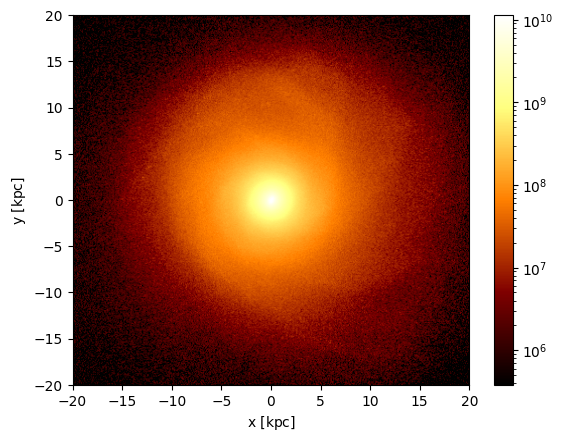

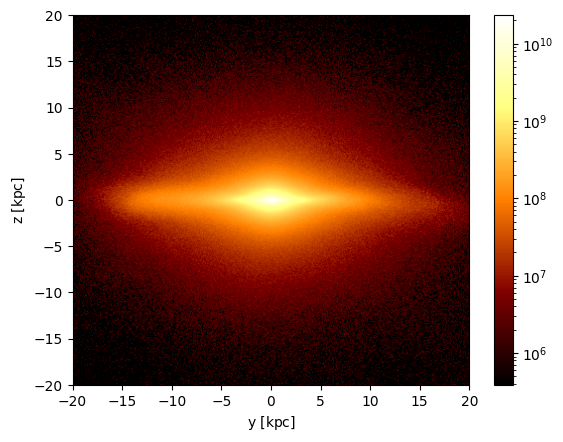

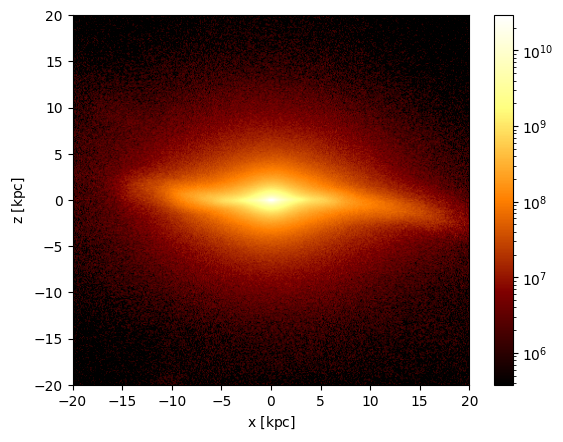

In [12]:
plot_image(part, "star", dimensions_plot=[0, 1])
plot_image(part, "star", dimensions_plot=[1, 2])
plot_image(part, "star", dimensions_plot=[0, 2])

In [13]:
part_unrotate = gizmo.io.Read.read_snapshots("all", "index", snap, simulation_directory=fire_dir)


# in utilities.simulation.Snapshot():
* reading:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.Partic

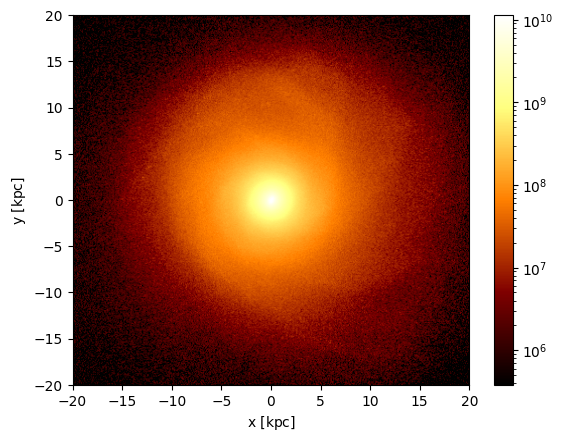

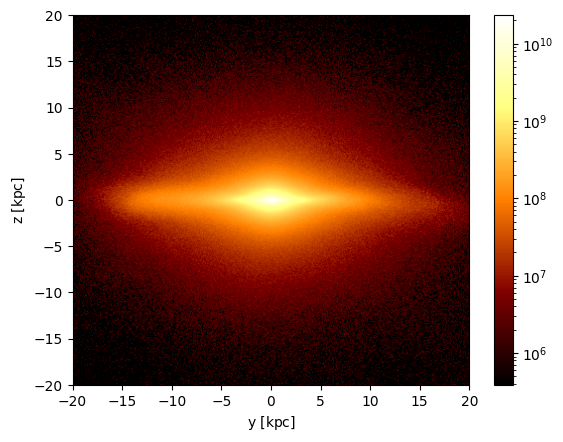

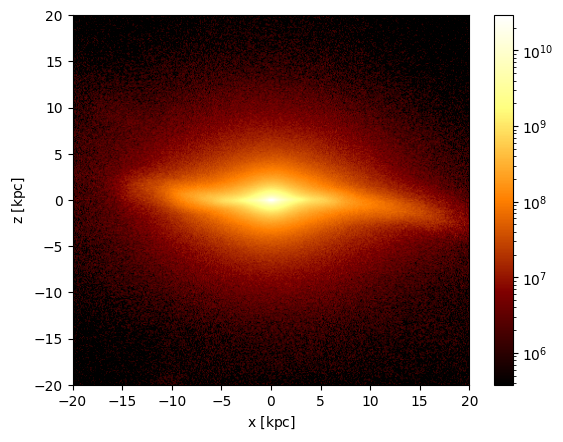

In [14]:
plot_image(part_unrotate, "star", dimensions_plot=[0, 1])
plot_image(part_unrotate, "star", dimensions_plot=[1, 2])
plot_image(part_unrotate, "star", dimensions_plot=[0, 2])